In [1]:
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# importing data
base_dir = '/home/minool/Documents/Projects/MachineLearning/HW3/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
# Convnet
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=3e-5), 
    metrics=['acc'])


# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 28s 277ms/step - loss: 0.6777 - acc: 0.6190 - val_loss: 0.4912 - val_acc: 0.7750
Epoch 2/100
100/100 [==============================] - 27s 268ms/step - loss: 0.5967 - acc: 0.6805 - val_loss: 0.4577 - val_acc: 0.7900
Epoch 3/100
100/100 [==============================] - 26s 262ms/step - loss: 0.5748 - acc: 0.6975 - val_loss: 0.4582 - val_acc: 0.7830
Epoch 4/100
100/100 [==============================] - 26s 264ms/step - loss: 0.5600 - acc: 0.7130 - val_loss: 0.4388 - val_acc: 0.7980
Epoch 5/100
100/100 [==============================] - 27s 269ms/step - loss: 0.5165 - acc: 0.7565 - val_loss: 0.4429 - val_acc: 0.7880
Epoch 6/100
100/100 [==============================] - 26s 260ms/step - loss: 0.5270 - acc: 0.7360 - val_loss: 0.3665 - val_acc: 0.8200
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 0.5011 - acc: 0.7540 - val_loss: 0.3507 - val_acc: 0.8330
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 27s 265ms/step - loss: 0.3922 - acc: 0.8325 - val_loss: 0.2634 - val_acc: 0.8950
Epoch 62/100
100/100 [==============================] - 27s 267ms/step - loss: 0.3939 - acc: 0.8180 - val_loss: 0.2614 - val_acc: 0.9040
Epoch 63/100
100/100 [==============================] - 26s 264ms/step - loss: 0.4041 - acc: 0.8170 - val_loss: 0.2893 - val_acc: 0.8790
Epoch 64/100
100/100 [==============================] - 26s 260ms/step - loss: 0.4071 - acc: 0.8150 - val_loss: 0.2257 - val_acc: 0.9180
Epoch 65/100
100/100 [==============================] - 27s 274ms/step - loss: 0.3988 - acc: 0.8290 - val_loss: 0.2701 - val_acc: 0.8890
Epoch 66/100
100/100 [==============================] - 27s 268ms/step - loss: 0.3970 - acc: 0.8235 - val_loss: 0.2747 - val_acc: 0.8910
Epoch 67/100
100/100 [==============================] - 27s 269ms/step - loss: 0.3890 - acc: 0.8275 - val_loss: 0.2497 - val_acc: 0.9020
Epoch 68/100
100/100 [===================

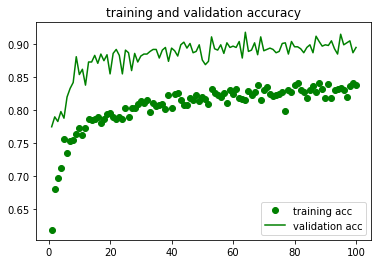

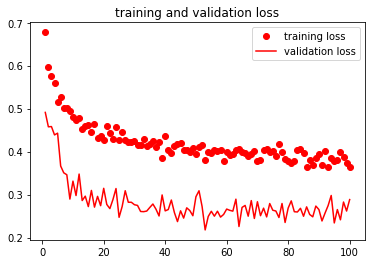

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'go', label='training acc')
plt.plot(epochs, val_acc, 'g', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'ro', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [9]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

('Validation loss:', 0.264124232493341)
('Validation accuracy:', 0.898999993801117)
